# Business Understanding

## Describe the purpose of the data set you selected:

&emsp; This data is the collection of two datasets, one which is from a resort hotel and the other which is from a city hotel. The datasets have 40,060 observations and 79,330 obeservations respectively with both sharing 31 variables. The observations time range from July 1st 2015 until August 31st 2017. The data was orginally collected from "Hotel Booking Demand Datasets", written by Nuno Antonio, Ana Almeida, and Luis Nune for Data in Brief, Volume 22, February 2019. The data was consolidated from bookings, change logs, meal, transaction, and customer profiles.
<br>    
![title](dataset_origin_image.jpg)
<br>
   
&emsp; The primary purpose for the selection of this dataset is to research revenue management,such as the forecast of demand and prediction of problems such the likelihood of a hotel booking to be cancelled. Additionally this data could be used to generate models to see when is the ideal time to book a hotel room, or which days and for how long could you get the best rates. 
    
    

# Data Understanding

## Describe the meaning and type of data:
&emsp; The full description of the data can be found in https://www.sciencedirect.com/science/article/pii/S2352340918315191:


| Variable | Type | Description | Source/Engineering |
| --- | --- | --- | --- |
| ADR | Numeric | Average Daily Rate as defined by | BO, BL and TR / Calculated by dividing the sum of all lodging transactions by the total number of staying nights |
| Adults | Integer | Number of adults | BO and BL |
| Agent | Categorical | ID of the travel agency that made the bookinga | BO and BL |
| ArrivalDateDayOfMonth | Integer | Day of the month of the arrival date | BO and BL |
| ArrivalDateMonth | Categorical | Month of arrival date with 12 categories: “January” to “December”| BO and BL |
| ArrivalDateWeekNumber	| Integer | Week number of the arrival date | BO and BL |
| ArrivalDateYear | Integer | Year of arrival date | BO and BL |
| AssignedRoomType | Categorical | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | BO and BL |
| Babies | Integer | Number of babies | BO and BL |
| BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | BO and BL/Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal |
| Children | Integer | Number of children | BO and BL/Sum of both payable and non-payable children |
| Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons	BO and BL. |
| Country | Categorical | Country of origin. Categories are represented in the ISO 3155–3:2013 format [6] | BO, BL and NT |
| CustomerType | Categorical | Type of booking, assuming one of four categories: <br> Contract - when the booking has an allotment or other type of contract associated to it; <br> Group – when the booking is associated to a group; <br> Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; <br> Transient-party – when the booking is transient, but is associated to at least other transient booking <br> | BO and BL |
| DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer | BO/Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS |
| DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: <br> No Deposit – no deposit was made; <br> Non Refund – a deposit was made in the value of the total stay cost; <br> Refundable – a deposit was made with a value under the total cost of stay. | BO and TR/Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date. |
| DistributionChannel | Categorical | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and DC |
| IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0) | BO |
| IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0) | BO, BL and C/ Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest |
| LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date | BO and BL/ Subtraction of the entering date from the arrival date |
| MarketSegment | Categorical | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and MS |
| Meal | Categorical | Type of meal booked. | Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package; <br> BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) | BO, BL and ML |
| PreviousBookingsNotCanceled | Integer | Number of previous bookings not cancelled by the customer prior to the current booking | BO and BL / In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled. |
| PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking | BO and BL/ In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled. |
| RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer | BO and BL |
| ReservationStatus | Categorical | Reservation last status, assuming one of three categories: <br> Canceled – booking was canceled by the customer; <br> Check-Out – customer has checked in but already departed; <br> No-Show – customer did not check-in and did inform the hotel of the reason why | BO |
| ReservationStatusDate | Date | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel | BO |
| ReservedRoomType | Categorical | Code of room type reserved. Code is presented instead of designation for anonymity reasons | BO and BL |
| StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel | BO and BL/ Calculated by counting the number of weekend nights from the total number of nights |
| StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | BO and BL/Calculated by counting the number of week nights from the total number of nights |
| TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor) | BO and BL/Sum of all special requests |
<br>


## Verify Data Quality

Data with missing values agent, company

<br>

In [19]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('hotel_bookings.csv') # read in the csv file

hotel_bookings.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [111]:
hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [18]:
hotel_bookings.mode()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  City Hotel            0          0               2016             August   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        33                         17   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    9.0    40.0                    0     Transient  62.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   

  reservation_status_date  
0              2015-10-21  

[1 rows x 32 columns]

In [13]:
hotel_bookings.loc[:,"agent"].mode()

0    9.0
dtype: float64

In [15]:
hotel_bookings.loc[:,"company"].mode()

0    40.0
dtype: float64

In [8]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Simple Stastics
<br>

In [16]:
hotel_bookings.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

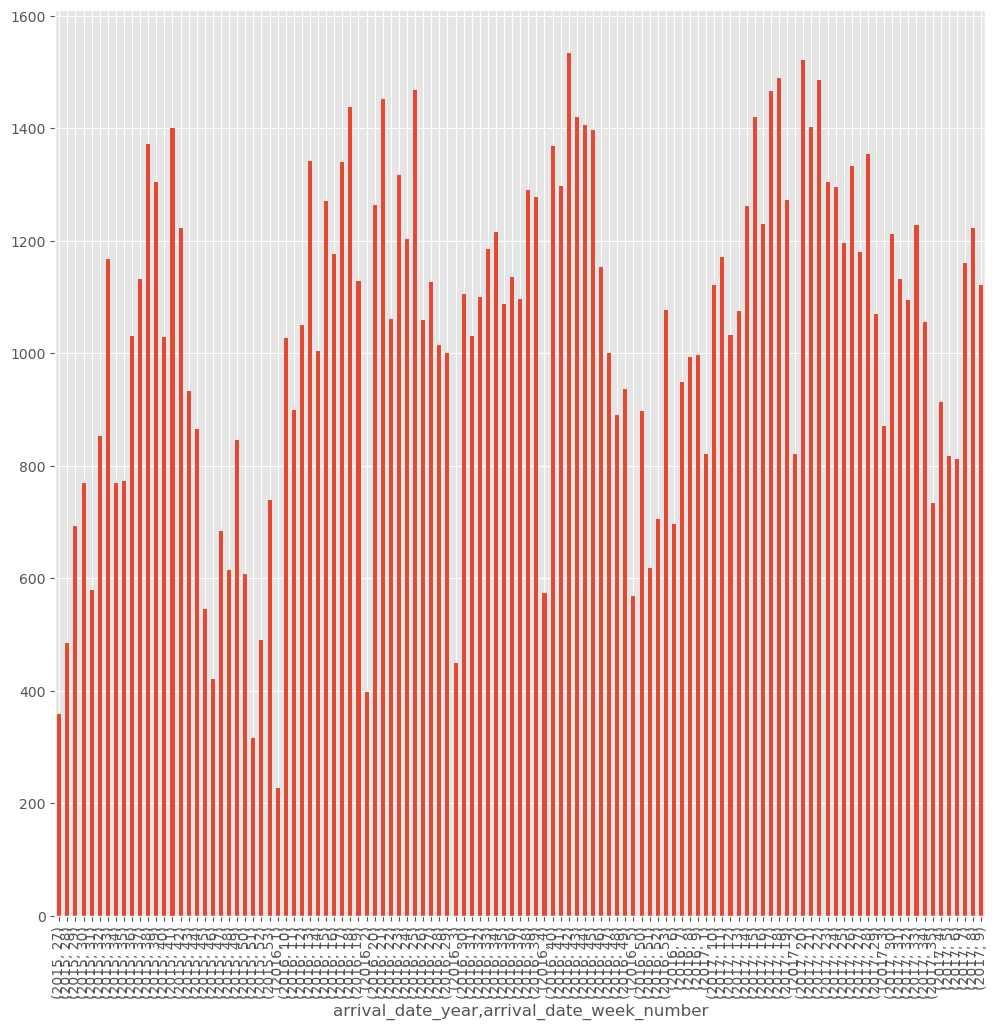

In [114]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
plt.style.use('ggplot')
fig=plt.figure(figsize=(12,12), dpi= 100, facecolor='w', edgecolor='k')

df_grouped = hotel_bookings.groupby(by=['arrival_date_year','arrival_date_week_number'])
visit_by_week = df_grouped.hotel.count()
b = visit_by_week.plot(kind='bar')

In [116]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
plt.style.use('ggplot')
fig=plt.figure(figsize=(12,30), dpi= 100, facecolor='w', edgecolor='k')

hotel_bookings2 = hotel_bookings
hotel_bookings2["arrival_date_year"] = hotel_bookings["arrival_date_year"].astype(str)
hotel_bookings2["arrival_date_week_number"] = hotel_bookings["arrival_date_week_number"].astype(str)

hotel_bookings2["week-date"] = hotel_bookings["arrival_date_year"].str.cat(hotel_bookings["arrival_date_week_number"],sep="-")
hotel_bookings2

#f = hotel_bookings2.groupby(by=['week-date','customer_type'])
hotel_bookings2[["week-date","customer_type","hotel"]]
f = hotel_bookings2.groupby(by=['week-date','customer_type'])
f.hotel.count()

f2 = hotel_bookings2.groupby(by=['customer_type'])

f2.hotel.count()


# sample = pd.crosstab([ hotel_bookings2['week-date'],hotel_bookings2['customer_type'] ], 
#                        hotel_bookings2.hotel.astype(bool))
# sample



#date_contract.info()
#f.groups()
#res = f.pivot(index='week-date', columns='category', values='quantity')



customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: hotel, dtype: int64

<Figure size 1200x3000 with 0 Axes>

array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>],
       [<AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>],
       [<AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>],
       [<AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'company'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'adr'}>],
       [<AxesSubplot:title={'center':'required_car_parking_spaces'}>,
        <Ax

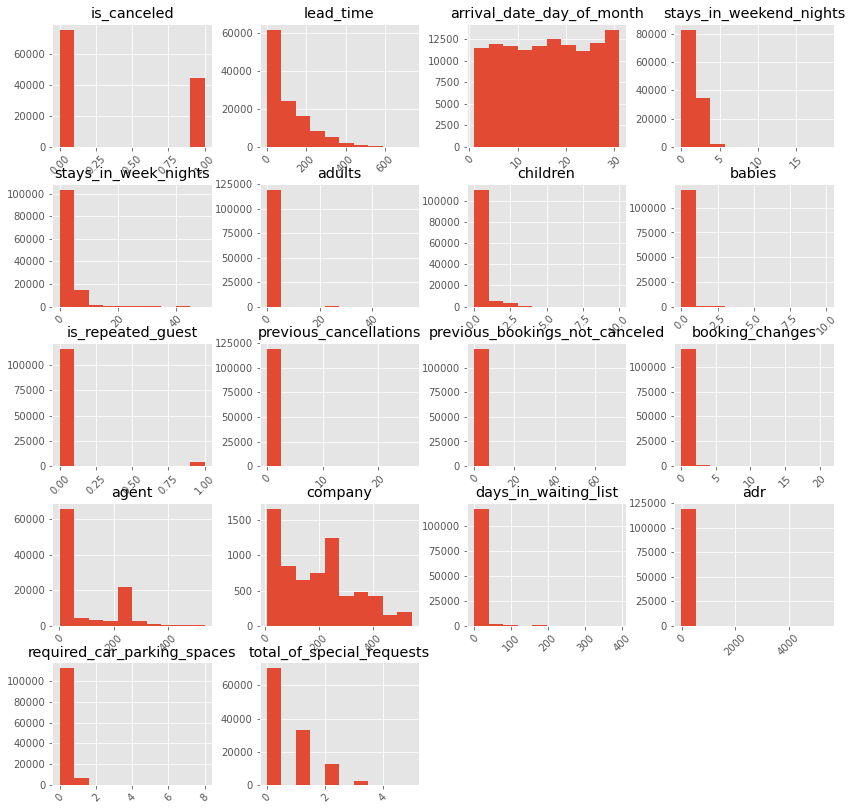

In [112]:
hotel_bookings.hist(figsize=(14,14), xrot=45)